In [61]:
from IPython.display import HTML
file_path = 'ex1_home3.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [62]:
from IPython.display import HTML
file_path = 'GD_home3.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [36]:
import numpy as np 
import matplotlib.pyplot as plt

In [125]:
def gradient_descent_fixalpha(f,grad_f,x0,kmax,tolf,tolx,alpha):

    if alpha <= 0:
        raise ValueError("Alpha must be greater than 0")
        
    x = [x0]
    f_val = [f(x0)]
    grads = [grad_f(x0)]
    err = [np.linalg.norm(grads[0])]

    for i in range(1,kmax):
        # Calculate the new point
        x_new = x[-1] - alpha * grads[-1]

        # Update the lists with new values
        x.append(x_new)
        f_val.append(f(x_new))
        grads.append(grad_f(x_new))
        err.append(np.linalg.norm(grad_f(x_new)))

        # Check the convergence conditions
        if (np.linalg.norm(grads[-1]) < tolf * np.linalg.norm(grads[0])) or (np.linalg.norm(x[-1] - x[-2]) < tolx * np.linalg.norm(x[0])):
            break
    
    return x, i, f_val, grads, err


In [126]:
def backtracking(f, grad_f, x):
    '''
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    '''
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha 

In [127]:
from IPython.display import HTML
file_path = 'Back_home3.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [128]:
def gradient_descent(f,grad_f,x0,kmax,tolf,tolx):
    
    x = [x0]
    f_val = [f(x0)]
    grads = [grad_f(x0)]
    err = [np.linalg.norm(grads[0])]

    for i in range(1,kmax):
        # Determine step size using backtracking
        alpha = backtracking(f,grad_f,x[-1])

        # Calculate the new point
        x_new = x[-1] - alpha * grads[-1]

        # Update the lists with new values
        x.append(x_new)
        f_val.append(f(x_new))
        grads.append(grad_f(x_new))
        err.append(np.linalg.norm(grad_f(x_new)))

        # Check the convergence conditions
        if (np.linalg.norm(grads[-1]) < tolf * np.linalg.norm(grads[0])) or (np.linalg.norm(x[-1] - x[-2]) < tolx * np.linalg.norm(x[0])):
            break
    
    return x, i, f_val, grads, err

In [129]:
from IPython.display import HTML
file_path = 'test_home3.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

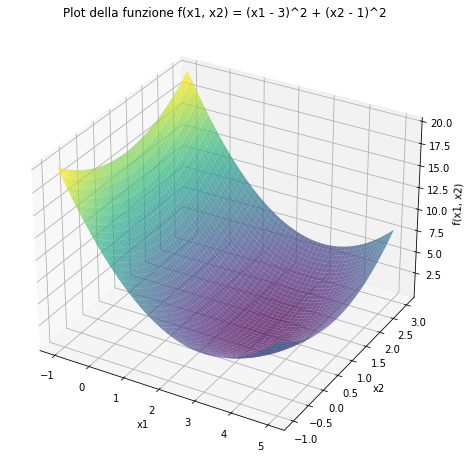

In [130]:
# 1 function

def f(x):
    x1,x2 = x
    return (x1 - 3)**2 + (x2 - 1)**2

def grad_f(x):
    x1,x2 = x
    return np.array([2 * (x1 - 3), 2 * (x2 - 1)])


# Creazione di una griglia di punti x1, x2
x1 = np.linspace(-1, 5, 400)  # Intervallo per x1
x2 = np.linspace(-1, 3, 400)  # Intervallo per x2
x = [x1,x2]
x1, x2 = np.meshgrid(x1, x2)  # Crea una griglia 2D di punti (x1, x2)

# Calcolo dei valori z corrispondenti sulla griglia
z = f(np.array([x1, x2]))

# Creazione del plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, z, cmap='viridis', alpha=0.7)  # Plotta la superficie

# Etichette e titolo
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Plot della funzione f(x1, x2) = (x1 - 3)^2 + (x2 - 1)^2')

# Mostra il plot
plt.show()


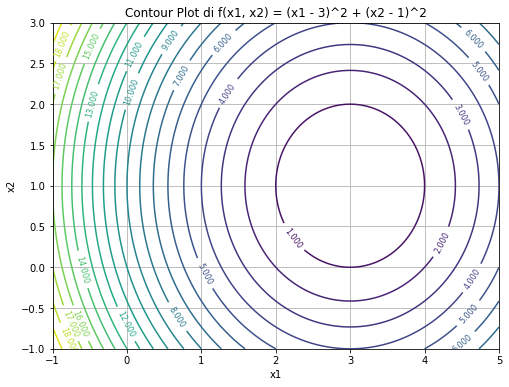

In [131]:
# Creazione del plot 2D di contorno
plt.figure(figsize=(8, 6))
contours = plt.contour(x1, x2, z, 20, cmap='viridis')  # 20 livelli di contorno
plt.clabel(contours, inline=True, fontsize=8)

# Etichette e titolo
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot di f(x1, x2) = (x1 - 3)^2 + (x2 - 1)^2')
plt.grid(True)

# Mostra il plot
plt.show()


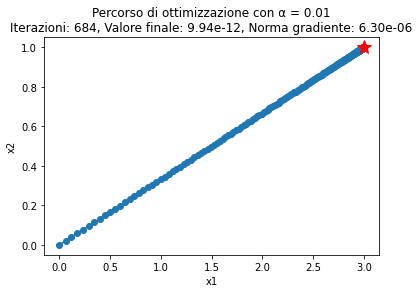

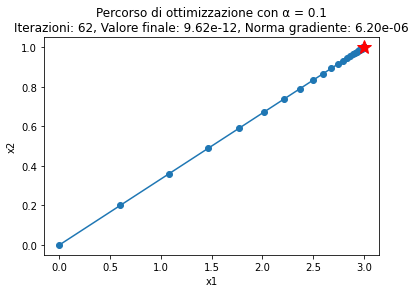

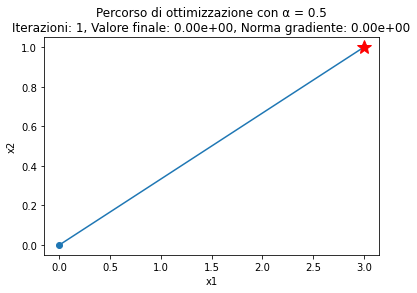

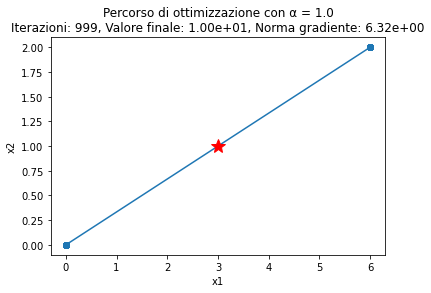

In [132]:
x0 = np.array([0.0, 0.0])  # Punto iniziale
kmax = 1000  # Numero massimo di iterazioni
tolf = 1e-6  # Tolleranza sul gradiente
tolx = 1e-6  # Tolleranza sulla posizione
alphas = [0.01, 0.1, 0.5, 1.0]  # Some alpha values to test

results_nobacktracking = {}
for alpha in alphas:
    results_nobacktracking[alpha] = gradient_descent_fixalpha(f, grad_f, x0, kmax, tolf, tolx, alpha)

# print(results_nobacktracking)


def plot_optimization_path(x_history, title, num_iterations, final_func_value, final_grad_norm):
    x_vals = [x[0] for x in x_history]
    y_vals = [x[1] for x in x_history]

    plt.plot(x_vals, y_vals, marker='o')
    plt.plot(3, 1, 'r*', markersize=15)  # Punto ottimale
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f"{title}\nIterazioni: {num_iterations}, Valore finale: {final_func_value:.2e}, Norma gradiente: {final_grad_norm:.2e}")
    plt.show()


for alpha, result in results_nobacktracking.items():
    path, num_iterations, f_val, grads, err = result
    final_point = path[-1]
    final_func_value = f_val[-1]
    final_grad_norm = np.linalg.norm(grads[-1])
    plot_optimization_path(path, f"Percorso di ottimizzazione con α = {alpha}", num_iterations, final_func_value, final_grad_norm)




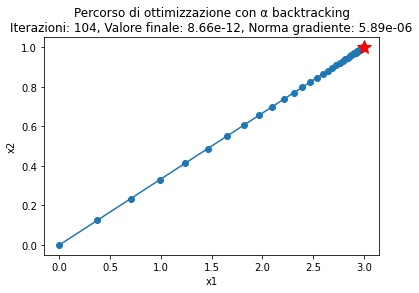

In [134]:
x0 = np.array([0.0, 0.0])  # Punto iniziale
kmax = 1000  # Numero massimo di iterazioni
tolf = 1e-6  # Tolleranza sul gradiente
tolx = 1e-6  # Tolleranza sulla posizione

path, num_iterations, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx)

#print(results_backtracking)


def plot_optimization_path(x_history, title, num_iterations, final_func_value, final_grad_norm):
    x_vals = [x[0] for x in x_history]
    y_vals = [x[1] for x in x_history]

    plt.plot(x_vals, y_vals, marker='o')
    plt.plot(3, 1, 'r*', markersize=15)  # Punto ottimale
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f"{title}\nIterazioni: {num_iterations}, Valore finale: {final_func_value:.2e}, Norma gradiente: {final_grad_norm:.2e}")
    plt.show()


final_point = path[-1]
final_func_value = f_val[-1]
final_grad_norm = np.linalg.norm(grads[-1])
plot_optimization_path(path, f"Percorso di ottimizzazione con α backtracking", num_iterations, final_func_value, final_grad_norm)

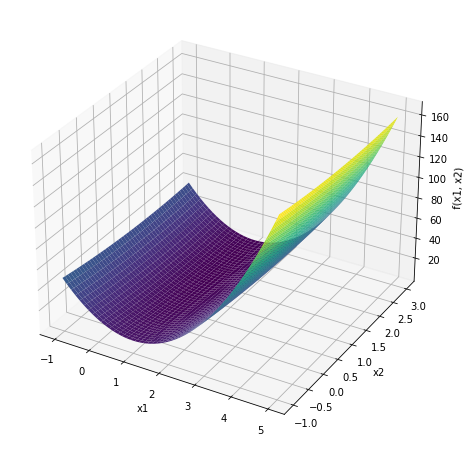

In [28]:
# 2 Function

z = 10 * (x1 - 1)**2 + (x2 - 2)**2

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, z, cmap='viridis')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
plt.show()


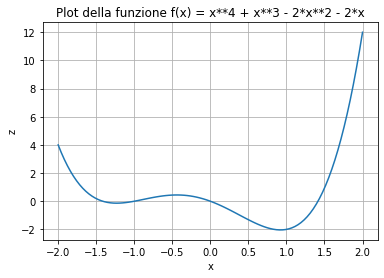

In [32]:
# 5 function 
x = np.linspace(-2, 2, 100)
z = x**4 + x**3 - 2*x**2 - 2*x

plt.plot(x,z)
plt.xlabel('x')
plt.ylabel('z')
plt.title('Plot della funzione f(x) = x**4 + x**3 - 2*x**2 - 2*x')
plt.grid()
plt.show()


In [95]:
from IPython.display import HTML
file_path = 'requests_home3.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)